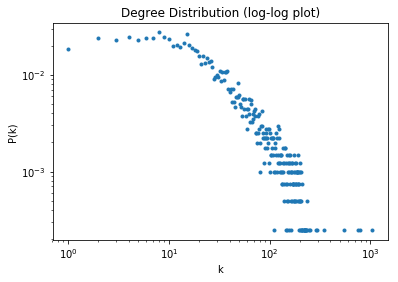

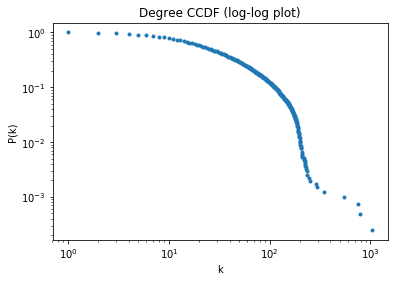

C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


gamma=  2.510263154767209   sigma=  0.04271669272448327    xmin=  47.0


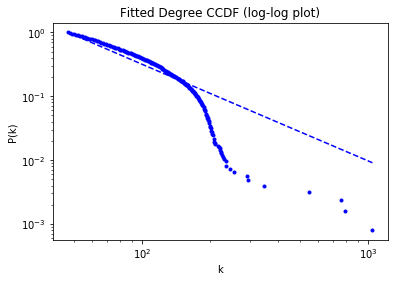

In [11]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections as col
import powerlaw
import operator
np.seterr(divide='ignore', invalid='ignore')

with open('facebook_combined.csv', 'rb') as inf:
    next(inf, '')   # skip header
    G = nx.read_edgelist(inf, delimiter=',', nodetype=int, encoding="utf-8")
    N = G.number_of_nodes()
    
    degree_sequence = sorted([d for n, d in G.degree()]) # list where each pos is degree
    degreeCount = col.Counter(degree_sequence) # dict where key is degree and val is number of nodes with that degree
    deg, cnt = zip(*degreeCount.items()) # separates key into 'deg' and val into 'cnt'  
    cnt_normalized = np.array(cnt) / N # probability of having a given degree (sorted)
    
    plt.title("Degree Distribution (log-log plot)")
    plt.ylabel("P(k)")
    plt.xlabel("k")    
    plt.loglog(deg, cnt_normalized, marker='.', linestyle="None")
    plt.show()    
    
    plt.title("Degree CCDF (log-log plot)")
    plt.ylabel("P(k)")
    plt.xlabel("k")
    ccsum_prob = np.cumsum(cnt_normalized[::-1])[::-1]
    plt.loglog(deg, ccsum_prob, marker='.', linestyle="None")
    plt.show()
    
    fit = powerlaw.Fit(np.array(degree_sequence), discrete=True, verbose=False)
    print('gamma= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma, '   xmin= ', fit.power_law.xmin,)
    fit.power_law.plot_ccdf(color='b', linestyle='--')
    fit.plot_ccdf(color='b', linestyle='None', marker='.')
    plt.title("Fitted Degree CCDF (log-log plot)")
    plt.ylabel("P(k)")
    plt.xlabel("k")
    plt.show()